In [2]:
from google.colab import files
uploaded = files.upload()


Saving fear_greed_index.csv to fear_greed_index (1).csv
Saving historical_data.csv to historical_data (1).csv


In [4]:
import pandas as pd

# Load both datasets
trader_df = pd.read_csv("historical_data (1).csv")
sentiment_df = pd.read_csv("fear_greed_index (1).csv")

# Preview
print("📊 Trader Data:")
display(trader_df.head())

print("\n🧠 Sentiment Data:")
display(sentiment_df.head())


📊 Trader Data:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12



🧠 Sentiment Data:


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [5]:
print("Trader Columns:\n", trader_df.columns.tolist())
print("\nSentiment Columns:\n", sentiment_df.columns.tolist())


Trader Columns:
 ['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp']

Sentiment Columns:
 ['timestamp', 'value', 'classification', 'date']


In [6]:
# Convert 'date' to datetime and simplify
sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.date

# Map 'classification' to numerical sentiment
sentiment_df['sentiment_score'] = sentiment_df['classification'].map({
    'Fear': -1,
    'Greed': 1,
    'Neutral': 0  # in case there are some neutral entries
})

# Preview cleaned sentiment data
sentiment_df[['date', 'classification', 'sentiment_score']].head()


,date,classification,sentiment_score
0,2018-02-01,Fear,-1.0
1,2018-02-02,Extreme Fear,NaN
2,2018-02-03,Fear,-1.0
3,2018-02-04,Extreme Fear,NaN
4,2018-02-05,Extreme Fear,NaN


In [7]:
# Convert timestamp to datetime
trader_df['Timestamp'] = pd.to_datetime(trader_df['Timestamp'])

# Create a new date column
trader_df['date'] = trader_df['Timestamp'].dt.date

# Ensure numeric PnL and size
trader_df['Closed PnL'] = pd.to_numeric(trader_df['Closed PnL'], errors='coerce')
trader_df['Size USD'] = pd.to_numeric(trader_df['Size USD'], errors='coerce')

# Normalize PnL per trade
trader_df['normalized_pnl'] = trader_df['Closed PnL'] / trader_df['Size USD'].replace(0, 1)


In [8]:
# Merge on date
merged_df = pd.merge(trader_df, sentiment_df[['date', 'sentiment_score']], on='date', how='left')

# Check result
merged_df[['Account', 'Coin', 'Closed PnL', 'sentiment_score']].head()


,Account,Coin,Closed PnL,sentiment_score
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,0.0,NaN
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,0.0,NaN
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,0.0,NaN
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,0.0,NaN
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,0.0,NaN


In [10]:
trader_df['date'].sort_values().unique()[:10]  # show first 10 unique dates


array([datetime.date(1970, 1, 1)], dtype=object)

In [11]:
sentiment_df['date'].sort_values().unique()[:10]


array([datetime.date(2018, 2, 1), datetime.date(2018, 2, 2),
       datetime.date(2018, 2, 3), datetime.date(2018, 2, 4),
       datetime.date(2018, 2, 5), datetime.date(2018, 2, 6),
       datetime.date(2018, 2, 7), datetime.date(2018, 2, 8),
       datetime.date(2018, 2, 9), datetime.date(2018, 2, 10)],
      dtype=object)

In [12]:
# Convert both to datetime.date
trader_df['date'] = pd.to_datetime(trader_df['Timestamp']).dt.date
sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.date


In [13]:
merged_df = pd.merge(trader_df, sentiment_df[['date', 'sentiment_score']], on='date', how='left')


In [14]:
merged_df[['Account', 'Coin', 'Closed PnL', 'date', 'sentiment_score']].head(10)


,Account,Coin,Closed PnL,date,sentiment_score
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,0.0,1970-01-01,NaN
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,0.0,1970-01-01,NaN
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,0.0,1970-01-01,NaN
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,0.0,1970-01-01,NaN
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,0.0,1970-01-01,NaN
5,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,0.0,1970-01-01,NaN
6,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,0.0,1970-01-01,NaN
7,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,0.0,1970-01-01,NaN
8,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,0.0,1970-01-01,NaN
9,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,0.0,1970-01-01,NaN


In [15]:
print("Total rows:", len(merged_df))
print("With sentiment:", merged_df['sentiment_score'].notnull().sum())
print("Missing sentiment:", merged_df['sentiment_score'].isnull().sum())


Total rows: 211224
With sentiment: 0
Missing sentiment: 211224


In [16]:
print("Timestamp IST sample:")
print(trader_df['Timestamp IST'].head())

print("\nTimestamp sample:")
print(trader_df['Timestamp'].head())


Timestamp IST sample:
0    02-12-2024 22:50
1    02-12-2024 22:50
2    02-12-2024 22:50
3    02-12-2024 22:50
4    02-12-2024 22:50
Name: Timestamp IST, dtype: object

Timestamp sample:
0   1970-01-01 00:28:50
1   1970-01-01 00:28:50
2   1970-01-01 00:28:50
3   1970-01-01 00:28:50
4   1970-01-01 00:28:50
Name: Timestamp, dtype: datetime64[ns]


In [17]:
# Replace invalid parsing attempt
trader_df['Timestamp'] = pd.to_datetime(trader_df['Timestamp IST'], errors='coerce')

# Now extract the date properly
trader_df['date'] = trader_df['Timestamp'].dt.date


In [18]:
print(trader_df[['Timestamp IST', 'Timestamp', 'date']].head())


      Timestamp IST           Timestamp        date
0  02-12-2024 22:50 2024-02-12 22:50:00  2024-02-12
1  02-12-2024 22:50 2024-02-12 22:50:00  2024-02-12
2  02-12-2024 22:50 2024-02-12 22:50:00  2024-02-12
3  02-12-2024 22:50 2024-02-12 22:50:00  2024-02-12
4  02-12-2024 22:50 2024-02-12 22:50:00  2024-02-12


In [20]:
merged_df = pd.merge(trader_df, sentiment_df[['date', 'sentiment_score']], on='date', how='left')


In [21]:
print(merged_df[['Account', 'Coin', 'Closed PnL', 'date', 'sentiment_score']].head())
print("With sentiment:", merged_df['sentiment_score'].notnull().sum())
print("Missing sentiment:", merged_df['sentiment_score'].isnull().sum())


                                      Account  Coin  Closed PnL        date  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107         0.0  2024-02-12   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107         0.0  2024-02-12   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107         0.0  2024-02-12   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107         0.0  2024-02-12   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107         0.0  2024-02-12   

   sentiment_score  
0              1.0  
1              1.0  
2              1.0  
3              1.0  
4              1.0  
With sentiment: 27917
Missing sentiment: 183307


In [23]:
print("Missing dates:", trader_df['date'].isnull().sum())


Missing dates: 131999


In [24]:
# Drop rows with missing date
trader_df = trader_df[trader_df['date'].notnull()]


In [25]:
# If not already done
trader_df['date'] = pd.to_datetime(trader_df['Timestamp IST'], errors='coerce').dt.date


In [26]:
min_date = trader_df['date'].min()
max_date = trader_df['date'].max()

print("Date range:", min_date, "to", max_date)


Date range: 2023-01-05 to 2025-12-04


In [27]:
# Create full range of calendar dates
full_dates = pd.DataFrame({'date': pd.date_range(start=min_date, end=max_date).date})

# Merge with sentiment and forward-fill
sentiment_filled = pd.merge(full_dates, sentiment_df[['date', 'sentiment_score']], on='date', how='left')
sentiment_filled['sentiment_score'] = sentiment_filled['sentiment_score'].ffill()

# Merge with trader data
merged_df = pd.merge(trader_df, sentiment_filled, on='date', how='left')


In [28]:
print("✅ Rows with sentiment:", merged_df['sentiment_score'].notnull().sum())
print("❌ Missing sentiment:", merged_df['sentiment_score'].isnull().sum())
merged_df[['date', 'Closed PnL', 'sentiment_score']].head()


✅ Rows with sentiment: 79225
❌ Missing sentiment: 0


,date,Closed PnL,sentiment_score
0,2024-02-12,0.0,1.0
1,2024-02-12,0.0,1.0
2,2024-02-12,0.0,1.0
3,2024-02-12,0.0,1.0
4,2024-02-12,0.0,1.0


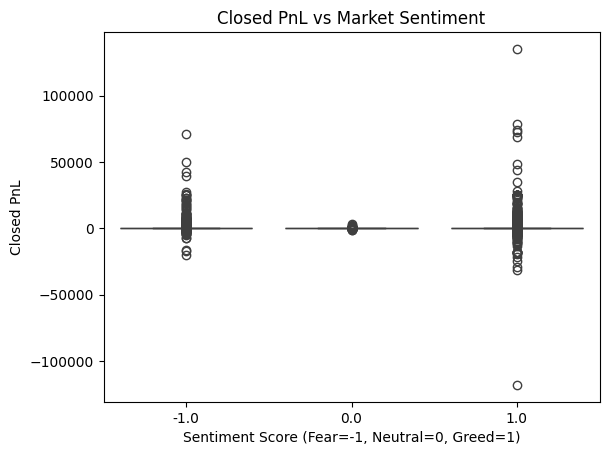

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='sentiment_score', y='Closed PnL', data=merged_df)
plt.title('Closed PnL vs Market Sentiment')
plt.xlabel('Sentiment Score (Fear=-1, Neutral=0, Greed=1)')
plt.ylabel('Closed PnL')
plt.show()


In [30]:
trader_perf = merged_df.groupby(['Account', 'sentiment_score'])['Closed PnL'].mean().unstack()
print(trader_perf.head())


sentiment_score                                   -1.0        0.0         1.0
Account                                                                      
0x083384f897ee0f19899168e3b1bec365f52a9012  502.539343        NaN  497.604878
0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd   11.397492  39.340428    0.034146
0x271b280974205ca63b716753467d5a371de622ab         NaN        NaN   26.473461
0x28736f43f1e871e6aa8b1148d38d4994275d72c4   16.632820   4.469915    7.606969
0x2c229d22b100a7beb69122eed721cee9b24011dd  -13.430710  10.906974   91.036173


In [31]:
coin_perf = merged_df.groupby(['Coin', 'sentiment_score'])['Closed PnL'].mean().unstack()
print(coin_perf)


sentiment_score       -1.0         0.0         1.0
Coin                                              
@1                8.664499         NaN  -23.991376
@10               0.000000         NaN   -0.031742
@103                   NaN         NaN    4.985462
@107             44.591837   28.328571  162.134620
@109                   NaN         NaN    0.000000
...                    ...         ...         ...
kBONK            18.714494  106.559987   71.344743
kFLOKI                 NaN         NaN    2.041975
kNEIRO                 NaN         NaN    1.063887
kPEPE            31.926586   87.187667   32.364790
kSHIB             0.000000         NaN   -0.747259

[183 rows x 3 columns]
